In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df1 = pd.read_csv('data1.csv')

In [4]:
df1.head()

,ID,Giới tính,Tuổi,Nghề nghiệp,Thời lượng ngủ,Chất lượng giấc ngủ,Mức độ hoạt động thể chất,Mức độ căng thẳng,Loại BMI,Huyết áp,Nhịp tim,Số bước hàng ngày,Rối loạn giấc ngủ
0,1,Nam,27,Kỹ sư phần mềm,6.1,6,42,6,Thừa cân,126/83,77,4200,Không
1,2,Nam,28,Bác sĩ,6.2,6,60,8,Bình thường,125/80,75,10000,Không
2,3,Nam,28,Bác sĩ,6.2,6,60,8,Bình thường,125/80,75,10000,Không
3,4,Nam,28,Đại diện bán hàng,5.9,4,30,8,Béo phì,140/90,85,3000,Ngưng thở khi ngủ
4,5,Nam,28,Đại diện bán hàng,5.9,4,30,8,Béo phì,140/90,85,3000,Ngưng thở khi ngủ


In [5]:
df1.tail()

,ID,Giới tính,Tuổi,Nghề nghiệp,Thời lượng ngủ,Chất lượng giấc ngủ,Mức độ hoạt động thể chất,Mức độ căng thẳng,Loại BMI,Huyết áp,Nhịp tim,Số bước hàng ngày,Rối loạn giấc ngủ
369,370,Nữ,59,Y tá,8.1,9,75,3,Thừa cân,140/95,68,7000,Ngưng thở khi ngủ
370,371,Nữ,59,Y tá,8.0,9,75,3,Thừa cân,140/95,68,7000,Ngưng thở khi ngủ
371,372,Nữ,59,Y tá,8.1,9,75,3,Thừa cân,140/95,68,7000,Ngưng thở khi ngủ
372,373,Nữ,59,Y tá,8.1,9,75,3,Thừa cân,140/95,68,7000,Ngưng thở khi ngủ
373,374,Nữ,59,Y tá,8.1,9,75,3,Thừa cân,140/95,68,7000,Ngưng thở khi ngủ


In [6]:
df.shape

(374, 13)

In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [9]:
df.drop('Person ID', axis = 1, inplace = True)

In [10]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep Disorder'].value_counts().index,
                             values=df['Sleep Disorder'].value_counts())])
fig.update_layout(title= 'Rối loạn giấc ngủ')
fig.show()

In [11]:
counts = df['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Giới tính')
fig.show()

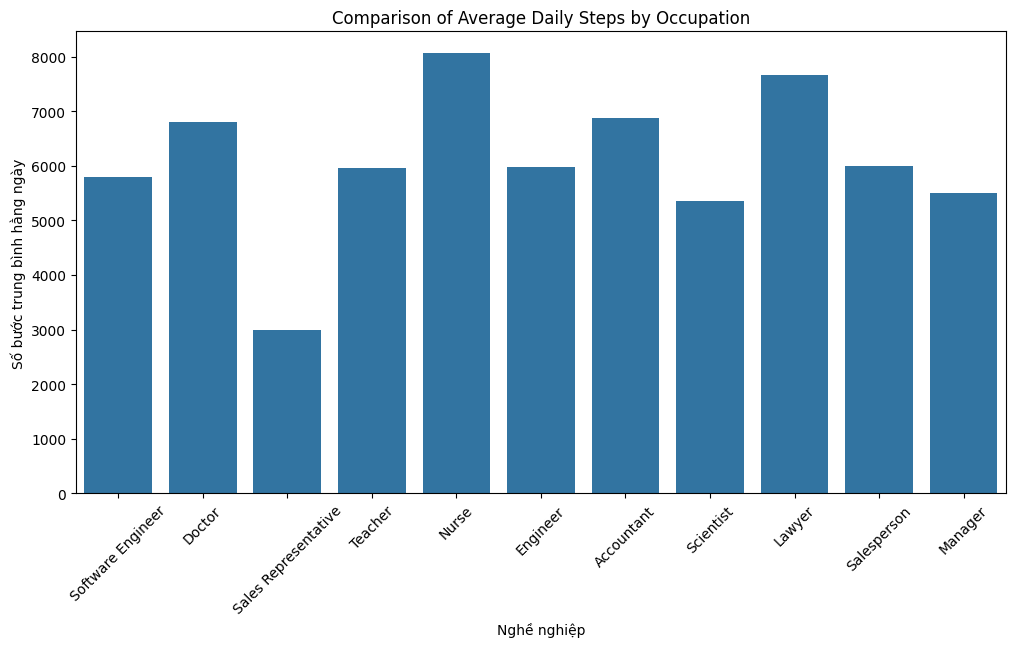

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily Steps", data=df, ci=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Nghề nghiệp")
plt.ylabel("Số bước trung bình hằng ngày")
plt.xticks(rotation=45)
plt.show()

In [13]:
fig = go.Figure(data=[go.Bar(x=df['BMI Category'].value_counts().index, y=df['BMI Category'].value_counts())])
fig.update_layout(
 title= 'BMI Category',
 xaxis_title="BMI Category",
 yaxis_title="Count"
 )
fig.show()

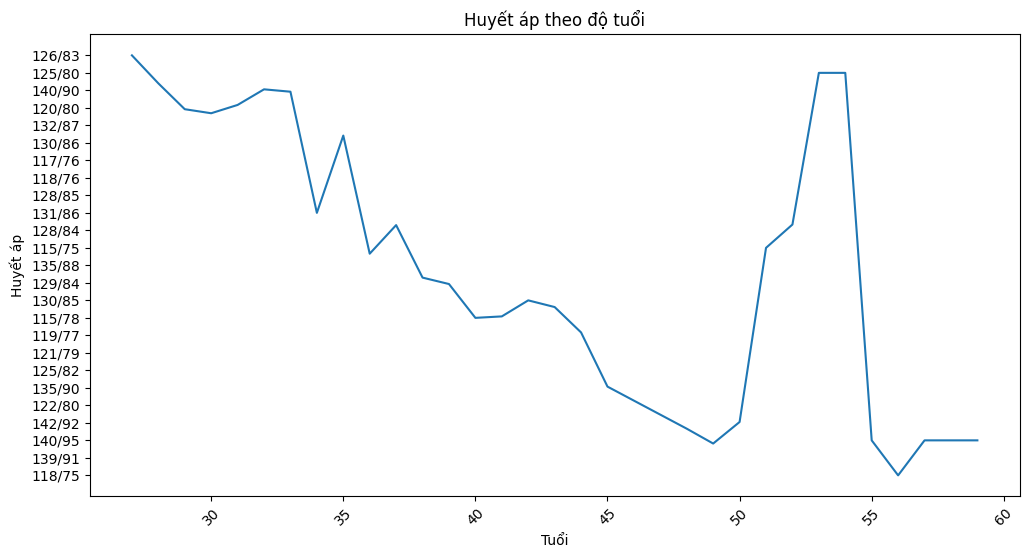

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Blood Pressure", data=df, ci=None)
plt.title("Huyết áp theo độ tuổi")
plt.xlabel("Tuổi")
plt.ylabel("Huyết áp")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Kiểm tra kiểu dữ liệu số
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/8

In [16]:

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [17]:
# Tạo bản sao của DataFrame chỉ với các cột đã chọn
df_selected = df.copy()

In [18]:
df_selected = df_selected.drop(['Blood Pressure',], axis = 1)

In [19]:
# Mã hóa các tính năng phân loại bằng cách sử dụng mã hóa một lần
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI Category'], drop_first = True, dtype = int) 

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   Sleep Disorder                   374 non-null    object 
 8   Systolic                         374 non-null    int64  
 9   Diastolic                        374 non-null    int64  
 10  Gender_Male                      374 non-null    int64  
 11  Occupation_Doctor                374 non-null    int64  
 12  Occupation_Engineer   

In [21]:
# Kiểm tra kiểu dữ liệu số
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df_encoded[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df_encoded.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df_encoded[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
Systolic: [126 125 140 120 132 130 117 118 128 131 115 135 129 119 121 122 142 139]
Diastolic: [83 80 90 87 86 76 85 84 75 88 78 77 79 82 92 95 91]
Gender_Male: [1 0]
Occupation_Doctor: [0 1]
Occupation_Engineer: [0 1]
Occupation_Lawyer: [0 1]
Occupation_Manager: [0 1]
Occupation_Nurse: [0 1]
Occupation_Sales Representative: [0 1]
Occupation_Salesperson: [0 1]
Occupation_Scientist: [0 1]
Occupation_Software

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df_encoded['Sleep Disorder'])
df_encoded.head()
# None = 1, Sleep Apnea=2 ,Insomnia = 0

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,1,126,83,...,0,0,0,0,0,1,0,0,0,1
1,28,6.2,6,60,8,75,10000,1,125,80,...,0,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,75,10000,1,125,80,...,0,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,85,3000,2,140,90,...,0,0,1,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,2,140,90,...,0,0,1,0,0,0,0,0,1,0


In [23]:
df_encoded.tail()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
369,59,8.1,9,75,3,68,7000,2,140,95,...,0,1,0,0,0,0,0,0,0,1
370,59,8.0,9,75,3,68,7000,2,140,95,...,0,1,0,0,0,0,0,0,0,1
371,59,8.1,9,75,3,68,7000,2,140,95,...,0,1,0,0,0,0,0,0,0,1
372,59,8.1,9,75,3,68,7000,2,140,95,...,0,1,0,0,0,0,0,0,0,1
373,59,8.1,9,75,3,68,7000,2,140,95,...,0,1,0,0,0,0,0,0,0,1


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Giả sử X là ma trận đặc trưng và y là biến mục tiêu
X = df_encoded.drop('Sleep Disorder', axis=1) # Bỏ biến mục tiêu khỏi bảng
y = df_encoded['Sleep Disorder']

# Tạo một bộ phân loại rừng ngẫu nhiên
clf = RandomForestClassifier()

# Điều chỉnh bộ phân loại phù hợp với dữ liệu
clf.fit(X, y)

RandomForestClassifier()

# Modelling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
logreg = LogisticRegression()


In [28]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [31]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.78      0.98      0.87        43
           2       0.91      0.62      0.74        16

    accuracy                           0.76        75
   macro avg       0.73      0.64      0.66        75
weighted avg       0.75      0.76      0.74        75



In [32]:
import numpy as np
import pandas as pd

# Thêm cột 1 cho bias
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Khởi tạo tham số
theta = np.zeros(X.shape[1])

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm huấn luyện Logistic Regression
def train_logistic_regression(X, y, theta, alpha, num_iterations):
    m = y.size
    for _ in range(num_iterations):
        z = np.dot(X, theta)
        predictions = sigmoid(z)
        # Cập nhật tham số theta
        theta -= alpha * (1/m) * np.dot(X.T, (predictions - y))
    return theta

# Huấn luyện mô hình
alpha = 0.01  # Tốc độ học
num_iterations = 1000  # Số lần lặp
theta = train_logistic_regression(X, y, theta, alpha, num_iterations)

# Dự đoán
def predict(X, theta):
    z = np.dot(X, theta)
    predictions = sigmoid(z)
    return [1 if p >= 0.5 else 0 for p in predictions]

# Dự đoán trên toàn bộ dữ liệu
y_pred = predict(X, theta)

# Đánh giá mô hình
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print("Accuracy: {:.2f}".format(accuracy(y, y_pred)))

Accuracy: 0.59


In [75]:
from sklearn.svm import SVC
svc_model = SVC()  
svc_model.fit(X_train, y_train)
y2_pred = svc_model.predict(X_test)


In [76]:
accuracy = accuracy_score(y_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.64


In [77]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.63      1.00      0.77        43
           2       0.80      0.25      0.38        16

    accuracy                           0.64        75
   macro avg       0.64      0.44      0.42        75
weighted avg       0.64      0.64      0.55        75



In [69]:
import numpy as np
import pandas as pd
y_encoded = label_encoder.fit_transform(y)
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

# Hàm SVM
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Huấn luyện
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Khởi tạo và huấn luyện mô hình SVM
svm = SVM()
svm.fit(X, y_encoded)

# Dự đoán
predictions = svm.predict(X)

# Chuyển đổi dự đoán về nhãn gốc
predictions = label_encoder.inverse_transform(np.where(predictions == 1, 1, 0))  # Cần điều chỉnh theo cách mã hóa của bạn

# Đánh giá mô hình
accuracy = np.mean(predictions == y)
print(f'Accuracy: ',accuracy)

Accuracy:  0.5855614973262032
